In [2]:
import numpy as np
import pandas as pd
import astropy.io.fits as fits
import healpy as hp
from scipy import integrate
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15 as cosmo
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
#from completeness import create_completeness_dataframe

In [3]:
galaxy_catalog_raw = fits.open('/home/farnoosh/Nextcloud/Master_Thesis_all/codes/data/GAMA/merged/StellarMass-gkvScience/mergedStellarMass-gkvScience')[1].data    # galaxies
efeds_raw = fits.open('/home/farnoosh/Nextcloud/Master_Thesis_all/codes/data/eFEDS/Mathias_Klug/efeds_members.fit')[1].data    # clusters

In [ ]:
galaxy_mask = (
         (galaxy_catalog_raw['uberclass'] == 1 ) & #galaxy
         (galaxy_catalog_raw['duplicate'] == False) &
         (galaxy_catalog_raw['mask'] == False) &
         (galaxy_catalog_raw['NQ'] > 2) &
         (galaxy_catalog_raw['SC'] > 7) &
         (galaxy_catalog_raw['mstar'] > 0) &
         (galaxy_catalog_raw['RAcen'] > 126.5) &
         (galaxy_catalog_raw['RAcen'] < 145.1) &
         (galaxy_catalog_raw['Deccen'] > -2.6) &
         (galaxy_catalog_raw['Deccen'] < 5.8) &
         (galaxy_catalog_raw['Z'] < 1.31) &
         (galaxy_catalog_raw['starmask'] == False)
)
galaxy_catalog = galaxy_catalog_raw[galaxy_mask]
print('number of the galaxies after masking: ',len(galaxy_catalog))

In [ ]:
cluster_mask =(
            ~np.isnan(efeds_raw['VDISP'])   # mask clusters which doesn't have VDISP values
 )
efeds_catalog = efeds_raw[cluster_mask]
print('number of the clusters after masking: ', len(efeds_catalog))

In [ ]:
H0 = 70
c = 3e5
arcmin_to_rad = np.pi / 180 / 60

In [ ]:
def distance_from_redshift(z):
    return c * z / H0

def cluster_volume(cluster_radius_Mpc):
    return (4/3) * np.pi * cluster_radius_Mpc**3

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['c_ID'] = efeds_catalog['ID-SRC'].byteswap().newbyteorder()
cluster_df['RA'] = (efeds_catalog['RA']).byteswap().newbyteorder()    # degrees
cluster_df['DEC'] = (efeds_catalog['DEC']).byteswap().newbyteorder()   # degrees
cluster_df['z'] = efeds_catalog['ZBEST'].byteswap().newbyteorder()
cluster_df['distance_Mpc'] = distance_from_redshift(cluster_df['z'])
cluster_df['cluster_radius_Mpc'] = efeds_catalog['R_LAMBDA']
cluster_df['cluster_volume_Mpc3'] = cluster_volume(cluster_df['cluster_radius_Mpc'])
cluster_df['cluster_Velocity_Dispersion'] = efeds_catalog['VDISP']  # (Km/s)

In [ ]:
plt.scatter(cluster_df['c_ID'],cluster_df['cluster_Velocity_Dispersion'])

In [41]:
cluster_df = pd.DataFrame()
cluster_df['c_ID'] = efeds_catalog['ID-SRC'].byteswap().newbyteorder()
cluster_df['RA'] = (efeds_catalog['RA']).byteswap().newbyteorder()    # degrees
cluster_df['DEC'] = (efeds_catalog['DEC']).byteswap().newbyteorder()   # degrees
cluster_df['z'] = efeds_catalog['ZBEST'].byteswap().newbyteorder()
cluster_df['distance_Mpc'] = distance_from_redshift(cluster_df['z'])
cluster_df['cluster_radius_Mpc'] = efeds_catalog['R_LAMBDA']
cluster_df['cluster_volume_Mpc3'] = cluster_volume(cluster_df['cluster_radius_Mpc'])
cluster_df['cluster_Velocity_Dispersion'] = efeds_catalog['VDISP']  # (Km/s)

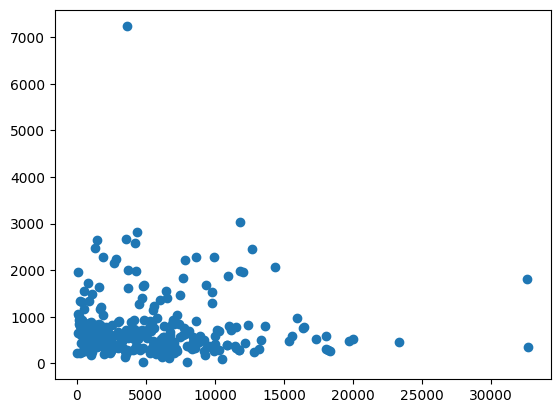

In [42]:
plt.scatter(cluster_df['c_ID'],cluster_df['cluster_Velocity_Dispersion'])